### Two datasets with a similar motif

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd

import torch
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


In [3]:
train1, test1 = mb.tl.create_simulated_data(motif='GATA', batch=0, n_trials=5000, seqlen=25) # multiplier=100)
train2, test2 = mb.tl.create_simulated_data(motif='GATA', batch=1, n_trials=5000, seqlen=25) #  multiplier=5000)

In [4]:
net2 = mb.models.DinucMulti(use_dinuc=False).to(device)
optimiser = topti.Adam(net2.parameters(), lr=0.001, weight_decay=0.0001)
criterion = mb.tl.PoissonLoss()
l2 = []
l2 += mb.tl.train_network(net2, train1, device, optimiser, criterion, num_epochs=300, log_each=30)

Epoch:  1, Loss: 0.977
Epoch: 31, Loss: 0.896
Epoch: 61, Loss: 0.894
Epoch: 91, Loss: 0.887
Epoch: 121, Loss: 0.881
Epoch: 151, Loss: 0.878
Epoch: 181, Loss: 0.876
Epoch: 211, Loss: 0.874
Epoch: 241, Loss: 0.875
Epoch: 271, Loss: 0.875


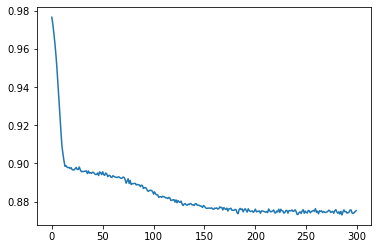

In [5]:
plt.plot(l2)

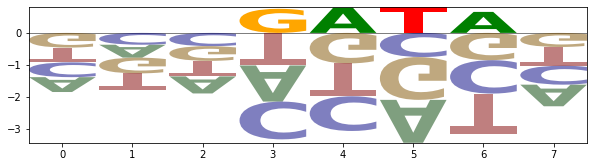

In [6]:
# print(np.exp(net2.log_weight_1.squeeze().cpu().detach().numpy()))
# print(np.exp(net.log_weight_2.squeeze().cpu().detach().numpy()))
#mb.tl.create_logo(net)
#plt.show()
#mb.tl.create_heatmap(net)
import logomaker
weights = net2.conv_mono.weight
weights = weights.squeeze().cpu().detach().numpy()
weights = pd.DataFrame(weights)
weights.index = 'A', 'C', 'G', 'T'
crp_logo = logomaker.Logo(weights.T, shade_below=.5, fade_below=.5)

In [ ]:
net2 = mb.models.DinucMulti(use_dinuc=False).to(device)
optimiser = topti.Adam(net2.parameters(), lr=0.001, weight_decay=0.0001)
criterion = mb.tl.PoissonLoss()
l2 = []
l2 += mb.tl.train_network(net2, train2, device, optimiser, criterion, num_epochs=300, log_each=30)

Epoch:  1, Loss: 0.978
Epoch: 31, Loss: 0.894
Epoch: 61, Loss: 0.891
Epoch: 91, Loss: 0.877
Epoch: 121, Loss: 0.868
Epoch: 151, Loss: 0.869
Epoch: 181, Loss: 0.867
Epoch: 211, Loss: 0.868
Epoch: 241, Loss: 0.869


In [ ]:
plt.plot(l2)

In [ ]:
# print(np.exp(net2.log_weight_1.squeeze().cpu().detach().numpy()))
# print(np.exp(net.log_weight_2.squeeze().cpu().detach().numpy()))
#mb.tl.create_logo(net)
#plt.show()
#mb.tl.create_heatmap(net)
import logomaker
weights = net2.conv_mono.weight
weights = weights.squeeze().cpu().detach().numpy()
weights = pd.DataFrame(weights)
weights.index = 'A', 'C', 'G', 'T'
crp_logo = logomaker.Logo(weights.T, shade_below=.5, fade_below=.5)